In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\soumy\Documents\project python')
os.getcwd()

'C:\\Users\\soumy\\Documents\\project python'

# Data Description #Image

# Import data packages

In [2]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import lightgbm as lgb #pip install lightgbm
from sklearn.preprocessing import LabelEncoder
#from bayes_opt import BayesianOptimization
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
import os
import matplotlib.pyplot as plt

In [3]:
appli_train = pd.read_csv('./Data/application_train.csv')
appli_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
appli_test = pd.read_csv('./Data/application_test.csv')
appli_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [5]:
# Finding the positvely and negatively correlated columns with the target
# Sorted the correlation values
corr = appli_train.corr()['TARGET'].sort_values()

In [6]:
# Positive Correlation Values
print('Positive Correlation Values:\n', corr.tail(15))
#Negative Correlation Values
print('Negative Correlation Values:\n', corr.head(15))

Positive Correlation Values:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
Negative Correlation Values:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645

In [7]:
appli_test["DAYS_BIRTH"] = abs(appli_test["DAYS_BIRTH"])
appli_train["DAYS_BIRTH"] = abs(appli_train["DAYS_BIRTH"])

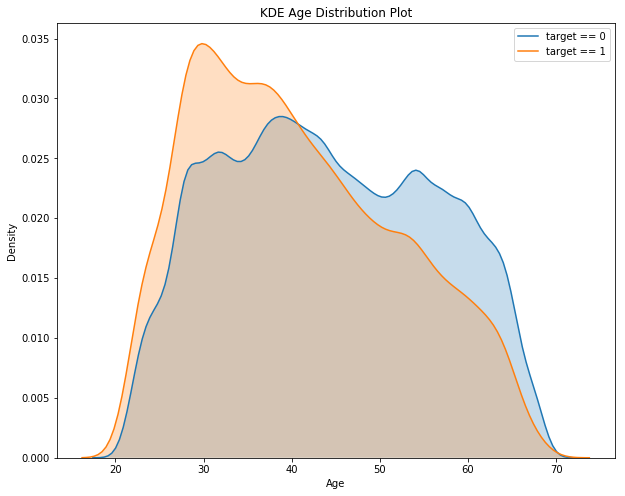

In [8]:
plt.figure(figsize = (10, 8))

# Kernel Density Estimation plot of loans that were repaid on time ( 0 indicates loan was repaid on time)
sns.distplot(appli_train.loc[appli_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0',hist = False,kde_kws = {'shade': True})
# Kernel Density Estimation plot of loans that were not repaid on time ( 1 indicates loan was not repaid on time)
sns.distplot(appli_train.loc[appli_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1', hist = False, kde_kws = {'shade': True})
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Age Distribution Plot')
plt.show()
#plt.savefig('KDE Age Distribution Plot.png')

In [16]:
# Extracting the columns with highest correlation with TARGET
ext_source_data = appli_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_source_data_corr = ext_source_data.corr()
ext_source_data_corr

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


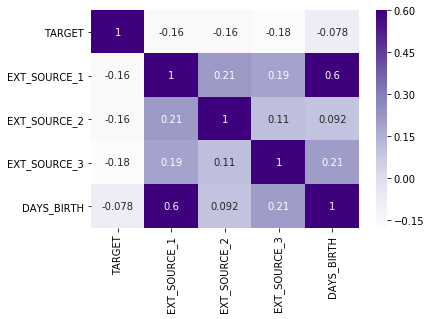

In [25]:
sns_plot = sns.heatmap(data=ext_source_data_corr, annot=True, vmax=0.6, cmap='Purples')
fig = sns_plot.get_figure()
fig.savefig('./Output_Images/Corr_heatmap.png')

In [52]:
age_group_data = appli_train[['TARGET', 'DAYS_BIRTH']]
age_group_data['YEARS_BIRTH'] = age_group_data['DAYS_BIRTH'] / 365
age_group_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11)) # Binning the age data
age_group_data.head(4)

C:\Users\soumy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\soumy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"


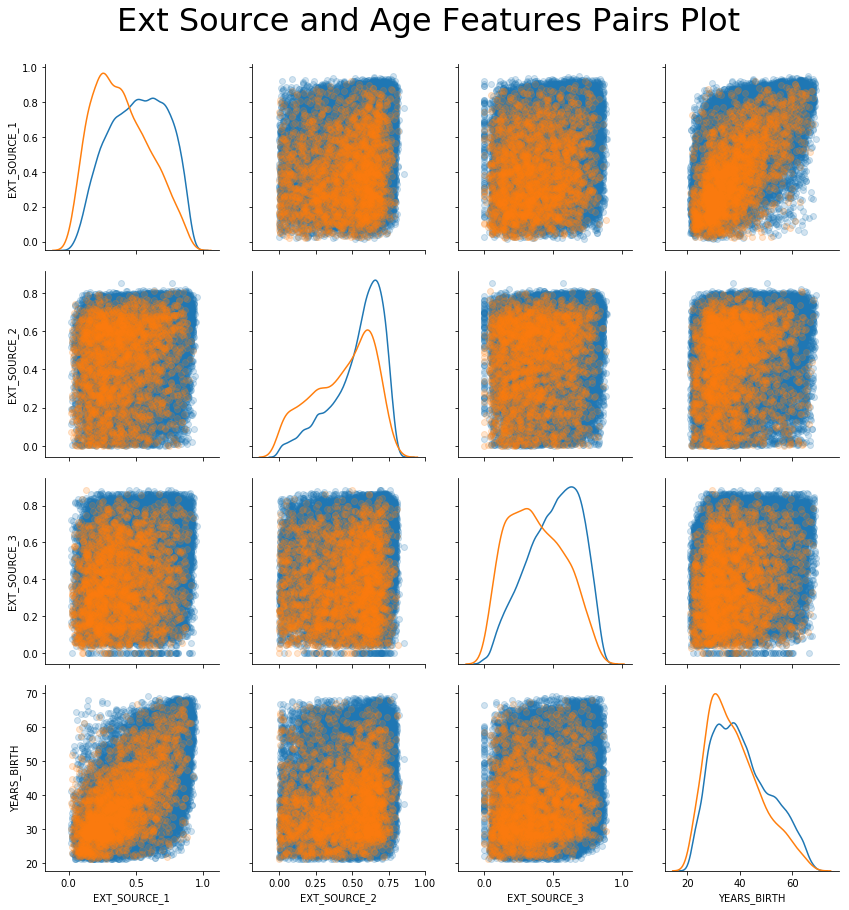

In [105]:
# Copy the data for plotting
plot_data = ext_source_data.drop('DAYS_BIRTH', axis = 1).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,hue = 'TARGET', vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(plt.scatter, alpha = 0.2);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);
plt.show()

C:\Users\soumy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\soumy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


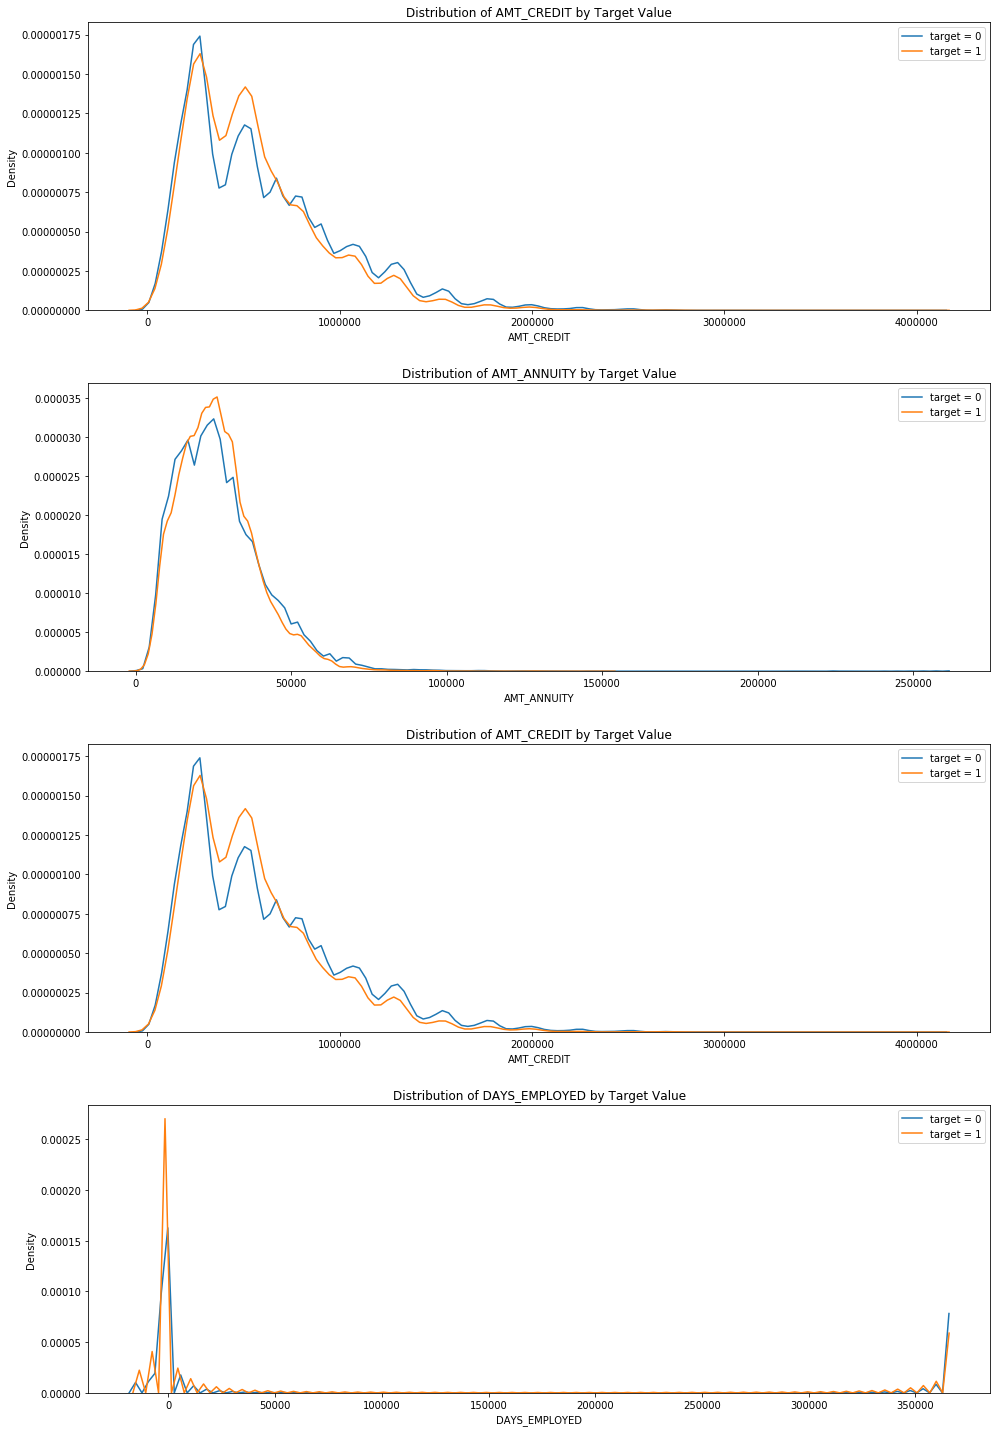

In [96]:
plt.figure(figsize = (14, 20))

# iterate through the new features
for i, column in enumerate(['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_CREDIT', 'DAYS_EMPLOYED']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot loans that were repaid
    sns.kdeplot(appli_train.loc[appli_train['TARGET'] == 0, column], label = 'target = 0')
    # plot loans that were not repaid
    sns.kdeplot(appli_train.loc[appli_train['TARGET'] == 1, column], label = 'target = 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' %column)
    plt.xlabel('%s' % column); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

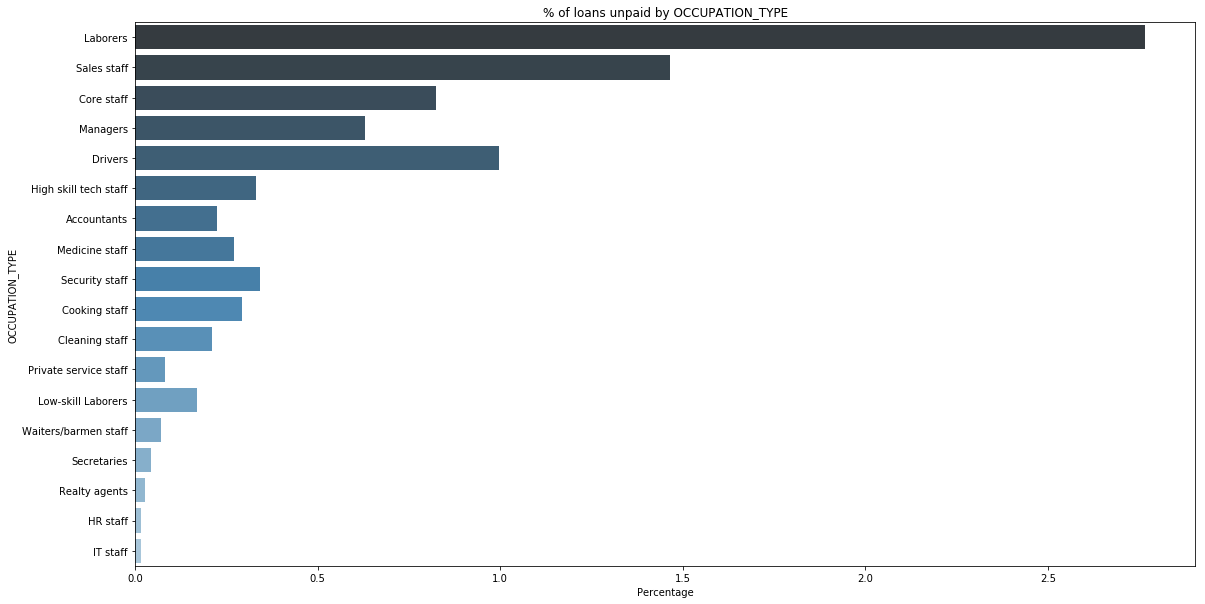

In [101]:
temp = appli_train["OCCUPATION_TYPE"].value_counts()
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(appli_train["TARGET"][appli_train["OCCUPATION_TYPE"]==val] == 1))
plt.figure(figsize=(19,10))
sns_plot = sns.barplot(((temp_y1/temp.sum())*100),temp.index,palette="Blues_d")
sns_plot.set_title("% of loans unpaid by OCCUPATION_TYPE")
sns_plot.set_xlabel("Percentage")
sns_plot.set_ylabel("OCCUPATION_TYPE")
fig = sns_plot.get_figure()
fig.savefig('./Output_Images/% of loans unpaid by OCCUPATION_TYPE.png')

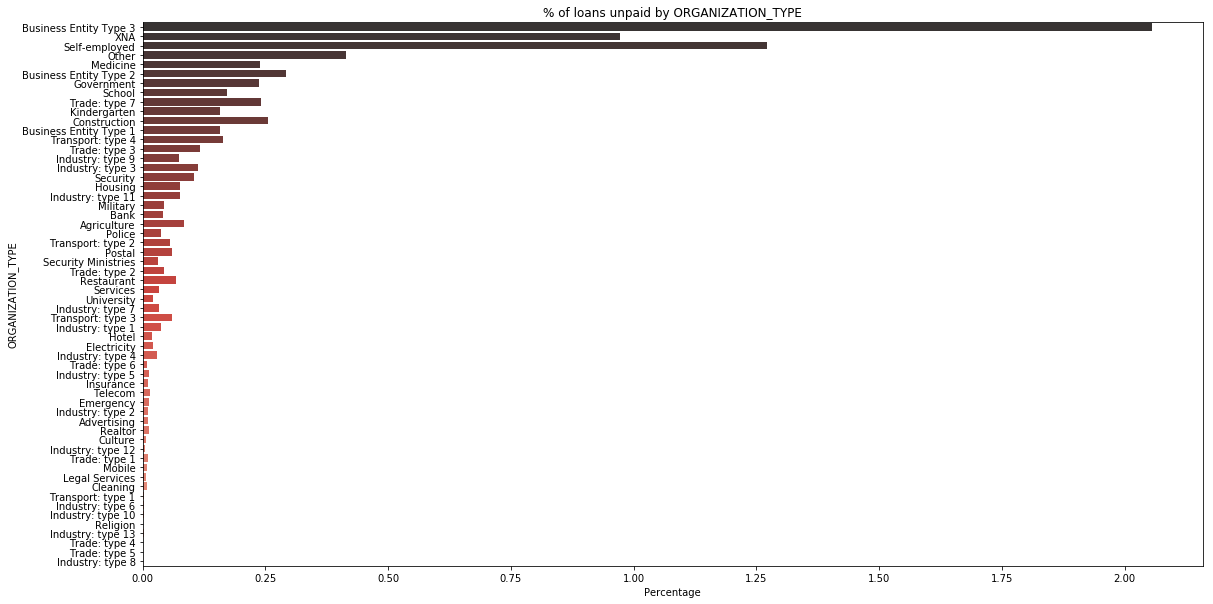

In [78]:
temp = appli_train["ORGANIZATION_TYPE"].value_counts()
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(appli_train["TARGET"][appli_train["ORGANIZATION_TYPE"]==val] == 1))
plt.figure(figsize=(19,10))
sns_plot = sns.barplot(((temp_y1/temp.sum())*100),temp.index,palette="Reds_d")
sns_plot.set_title("% of loans unpaid by ORGANIZATION_TYPE")
sns_plot.set_xlabel("Percentage")
sns_plot.set_ylabel("ORGANIZATION_TYPE")
fig = sns_plot.get_figure()
fig.savefig('./Output_Images/% of loans unpaid by ORGANIZATION_TYPE.png')

In [ ]:
temp = appli_train["ORGANIZATION_TYPE"].value_counts()
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(appli_train["TARGET"][appli_train["ORGANIZATION_TYPE"]==val] == 1))
plt.figure(figsize=(19,10))
sns_plot = sns.barplot(((temp_y1/temp.sum())*100),temp.index,palette="Reds_d")
sns_plot.set_title("% of loans unpaid by ORGANIZATION_TYPE")
sns_plot.set_xlabel("Percentage")
sns_plot.set_ylabel("ORGANIZATION_TYPE")
fig = sns_plot.get_figure()
fig.savefig('./Output_Images/% of loans unpaid by ORGANIZATION_TYPE.png')

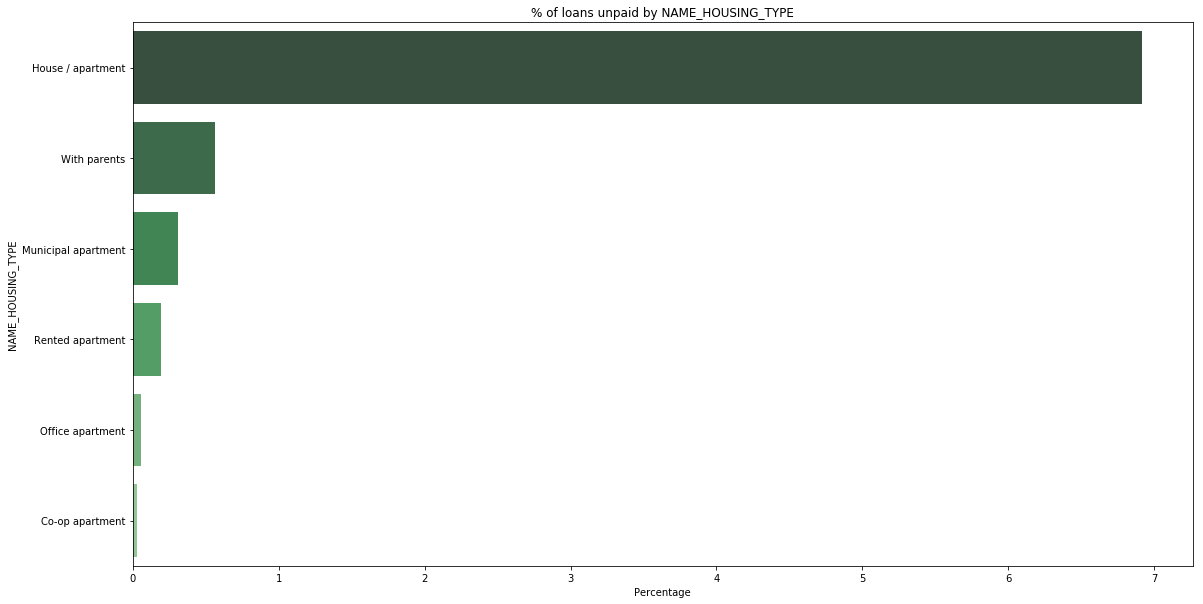

In [98]:
temp = appli_train["NAME_HOUSING_TYPE"].value_counts()
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(appli_train["TARGET"][appli_train["NAME_HOUSING_TYPE"]==val] == 1))
plt.figure(figsize=(19,10))
sns_plot = sns.barplot(((temp_y1/temp.sum())*100),temp.index,palette="Greens_d")
sns_plot.set_title("% of loans unpaid by NAME_HOUSING_TYPE")
sns_plot.set_xlabel("Percentage")
sns_plot.set_ylabel("NAME_HOUSING_TYPE")
fig = sns_plot.get_figure()
fig.savefig('./Output_Images/% of loans unpaid by NAME_HOUSING_TYPE.png')

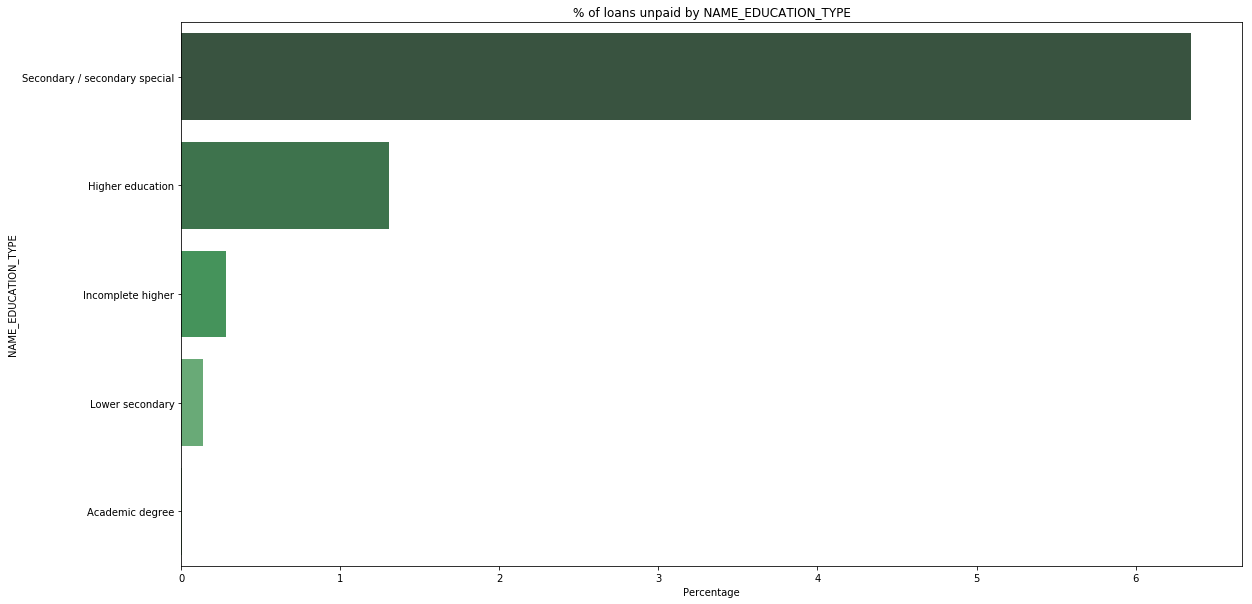

In [102]:
temp = appli_train["NAME_EDUCATION_TYPE"].value_counts()
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(appli_train["TARGET"][appli_train["NAME_EDUCATION_TYPE"]==val] == 1))
plt.figure(figsize=(19,10))
sns_plot = sns.barplot(((temp_y1/temp.sum())*100),temp.index,palette="Greens_d")
sns_plot.set_title("% of loans unpaid by NAME_EDUCATION_TYPE")
sns_plot.set_xlabel("Percentage")
sns_plot.set_ylabel("NAME_EDUCATION_TYPE")
fig = sns_plot.get_figure()
fig.savefig('./Output_Images/% of loans unpaid by NAME_EDUCATION_TYPE.png')

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

# Missing Data Observations

In [140]:
#Missing Values in train
missing_val = appli_train.isnull().sum().sort_values(ascending=False)
print("Missing Values in Train Data\n",missing_val.head(10))

Missing Values in Train Data
 COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
dtype: int64


In [135]:
# Missing value percentage
missing_val_percent = (missing_val * 100) / len(appli_train)
# Table with missing values and respective percentages
missing_val_table = pd.concat([missing_val, missing_val_percent], axis=1)
missing_val_table.head(10)

,0,1
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.003902


In [134]:
# Rename the columns
missing_val_table_ren_columns = missing_val_table.rename(columns = {0 : 'Missing Values Count', 1 : 'Missing Values Percentage'})
# Sort the table by percentage of missing descending
missing_val_table_ren_columns = missing_val_table_ren_columns[missing_val_table_ren_columns.iloc[:,1] != 0].sort_values('Missing Values Percentage', ascending=False).round(1)
print(" mis_val_table_ren_columns\n", mis_val_table_ren_columns.head(20))
print ("Out of " + str(appli_train.shape[1]) + " columns.\n" + str(missing_val_table_ren_columns.shape[0]) + " columns have missing values.")

 mis_val_table_ren_columns
                           Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_

In [189]:
# Missing values statistics
missing_values = missing_values_table(appli_train)
missing_values.head(67)
missing_values_perc= missing_values["% of Total Values"]
df = missing_values_perc

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


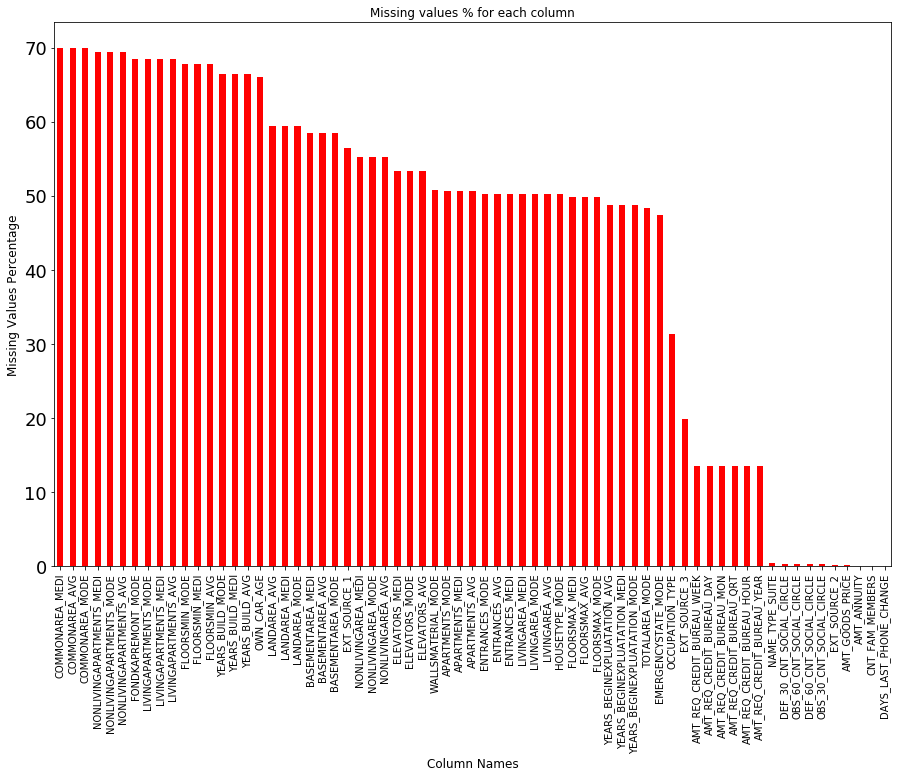

In [197]:
import matplotlib.pyplot as plt
sns_plot = missing_values_perc.plot(kind='bar', title ="Missing values % for each column",figsize=(15,10), fontsize=18,color="red")
sns_plot.set_xlabel("Column Names",fontsize=12)
sns_plot.set_ylabel("Missing Values Percentage",fontsize = 12)
plt.xticks(rotation = 90, fontsize = 10)
fig = sns_plot.get_figure()
fig.savefig('./Output_Images/Missing values % for each column.png')
plt.show()

# Handling Missing Data

In [198]:
appli_clean_train=appli_train
flt_col = appli_clean_train.columns[appli_clean_train.dtypes==float]
appli_clean_train[flt_col] = appli_clean_train[flt_col].fillna(appli_clean_train[flt_col].mean())

In [201]:
obj_col = appli_clean_train.columns[appli_clean_train.dtypes==object]
appli_clean_train[obj_col] = appli_clean_train[obj_col].fillna(appli_clean_train[obj_col].mode())
appli_clean_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,1.000000,1.000000
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.000000,0.000,0.000000,1.000000,1.000000,2.000000
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974


In [204]:
appli_clean_train.to_csv('./Data/application_train_clean.csv')

In [213]:
#Missing Values in train
missing_val = appli_clean_train.isnull().sum().sort_values(ascending=False)
print("Missing Values in Train Data\n",missing_val.head(10))
missing_val.to_csv("./Data/Missing_values.csv")

Missing Values in Train Data
 FONDKAPREMONT_MODE         210295
WALLSMATERIAL_MODE         156341
HOUSETYPE_MODE             154297
EMERGENCYSTATE_MODE        145755
OCCUPATION_TYPE             96391
NAME_TYPE_SUITE              1292
LIVINGAPARTMENTS_AVG            0
ORGANIZATION_TYPE               0
NONLIVINGAPARTMENTS_AVG         0
LIVINGAREA_AVG                  0
dtype: int64


In [212]:
appli_clean_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  